In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [5]:
print(train.shape)
print(test.shape)

(19219, 35)
(12814, 28)


In [6]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [7]:
train.iloc[:, :18]

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390


In [8]:
train.iloc[:, 18:]

,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [9]:
train.iloc[:, :17].describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500


In [10]:
train.iloc[:, 17:].describe()

,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,0.574520,0.030609,0.614749,0.831652,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,0.259436,0.047302,0.222391,0.220966,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.008300,0.001500,0.014400,0.105000,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375750,0.006600,0.451600,0.655200,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.545400,0.009500,0.636400,0.964300,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.818200,0.019100,0.785700,1.000000,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.665100,1.000000,1.000000,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
train["Pastry"].value_counts()

Pastry
0    17753
1     1466
Name: count, dtype: int64

In [12]:
train["Z_Scratch"].value_counts()

Z_Scratch
0    18069
1     1150
Name: count, dtype: int64

In [13]:
train["K_Scatch"].value_counts()

K_Scatch
0    15787
1     3432
Name: count, dtype: int64

In [14]:
train["Stains"].value_counts()

Stains
0    18651
1      568
Name: count, dtype: int64

In [15]:
train["Dirtiness"].value_counts()

Dirtiness
0    18734
1      485
Name: count, dtype: int64

In [16]:
train["Other_Faults"].value_counts()

Other_Faults
0    12661
1     6558
Name: count, dtype: int64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'X_Minimum'}>,
        <Axes: title={'center': 'X_Maximum'}>,
        <Axes: title={'center': 'Y_Minimum'}>,
        <Axes: title={'center': 'Y_Maximum'}>,
        <Axes: title={'center': 'Pixels_Areas'}>],
       [<Axes: title={'center': 'X_Perimeter'}>,
        <Axes: title={'center': 'Y_Perimeter'}>,
        <Axes: title={'center': 'Sum_of_Luminosity'}>,
        <Axes: title={'center': 'Minimum_of_Luminosity'}>,
        <Axes: title={'center': 'Maximum_of_Luminosity'}>,
        <Axes: title={'center': 'Length_of_Conveyer'}>],
       [<Axes: title={'center': 'TypeOfSteel_A300'}>,
        <Axes: title={'center': 'TypeOfSteel_A400'}>,
        <Axes: title={'center': 'Steel_Plate_Thickness'}>,
        <Axes: title={'center': 'Edges_Index'}>,
        <Axes: title={'center': 'Empty_Index'}>,
        <Axes: title={'center': 'Square_Index'}>],
       [<Axes: title={'center': 'Outside_X_Index'}>,
        <Axes: title={'c

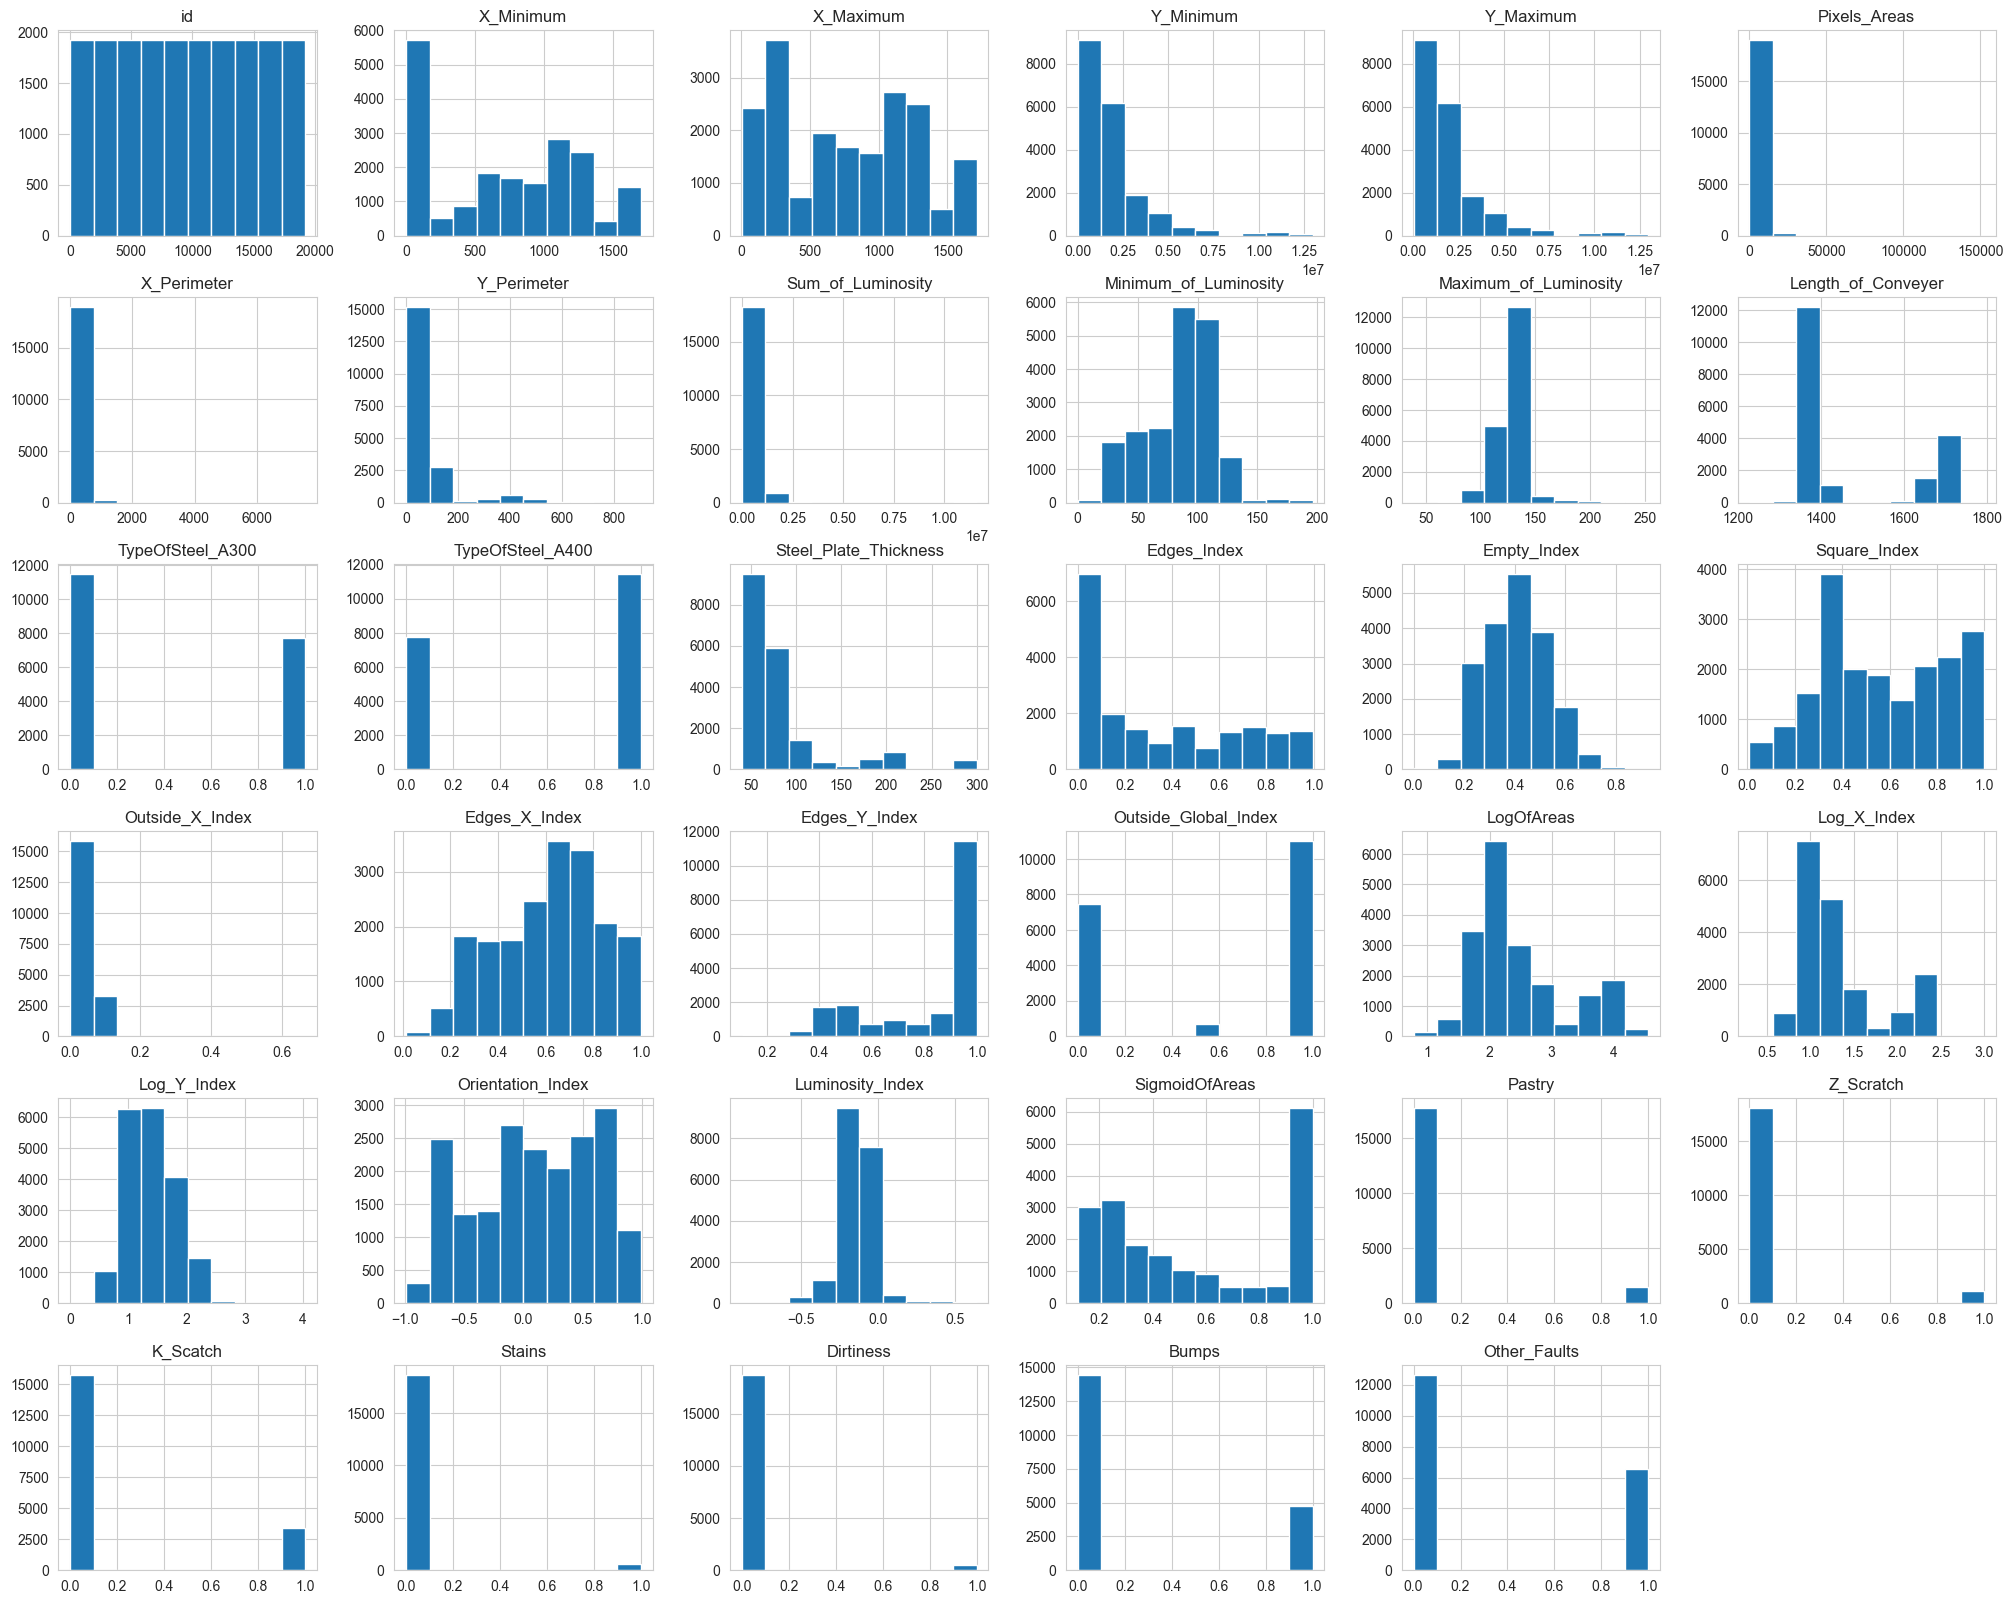

In [17]:
train.hist(figsize=(25, 20))

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'X_Minimum'}>,
        <Axes: title={'center': 'X_Maximum'}>,
        <Axes: title={'center': 'Y_Minimum'}>,
        <Axes: title={'center': 'Y_Maximum'}>],
       [<Axes: title={'center': 'Pixels_Areas'}>,
        <Axes: title={'center': 'X_Perimeter'}>,
        <Axes: title={'center': 'Y_Perimeter'}>,
        <Axes: title={'center': 'Sum_of_Luminosity'}>,
        <Axes: title={'center': 'Minimum_of_Luminosity'}>],
       [<Axes: title={'center': 'Maximum_of_Luminosity'}>,
        <Axes: title={'center': 'Length_of_Conveyer'}>,
        <Axes: title={'center': 'TypeOfSteel_A300'}>,
        <Axes: title={'center': 'TypeOfSteel_A400'}>,
        <Axes: title={'center': 'Steel_Plate_Thickness'}>],
       [<Axes: title={'center': 'Edges_Index'}>,
        <Axes: title={'center': 'Empty_Index'}>,
        <Axes: title={'center': 'Square_Index'}>,
        <Axes: title={'center': 'Outside_X_Index'}>,
        <Axes: title={'c

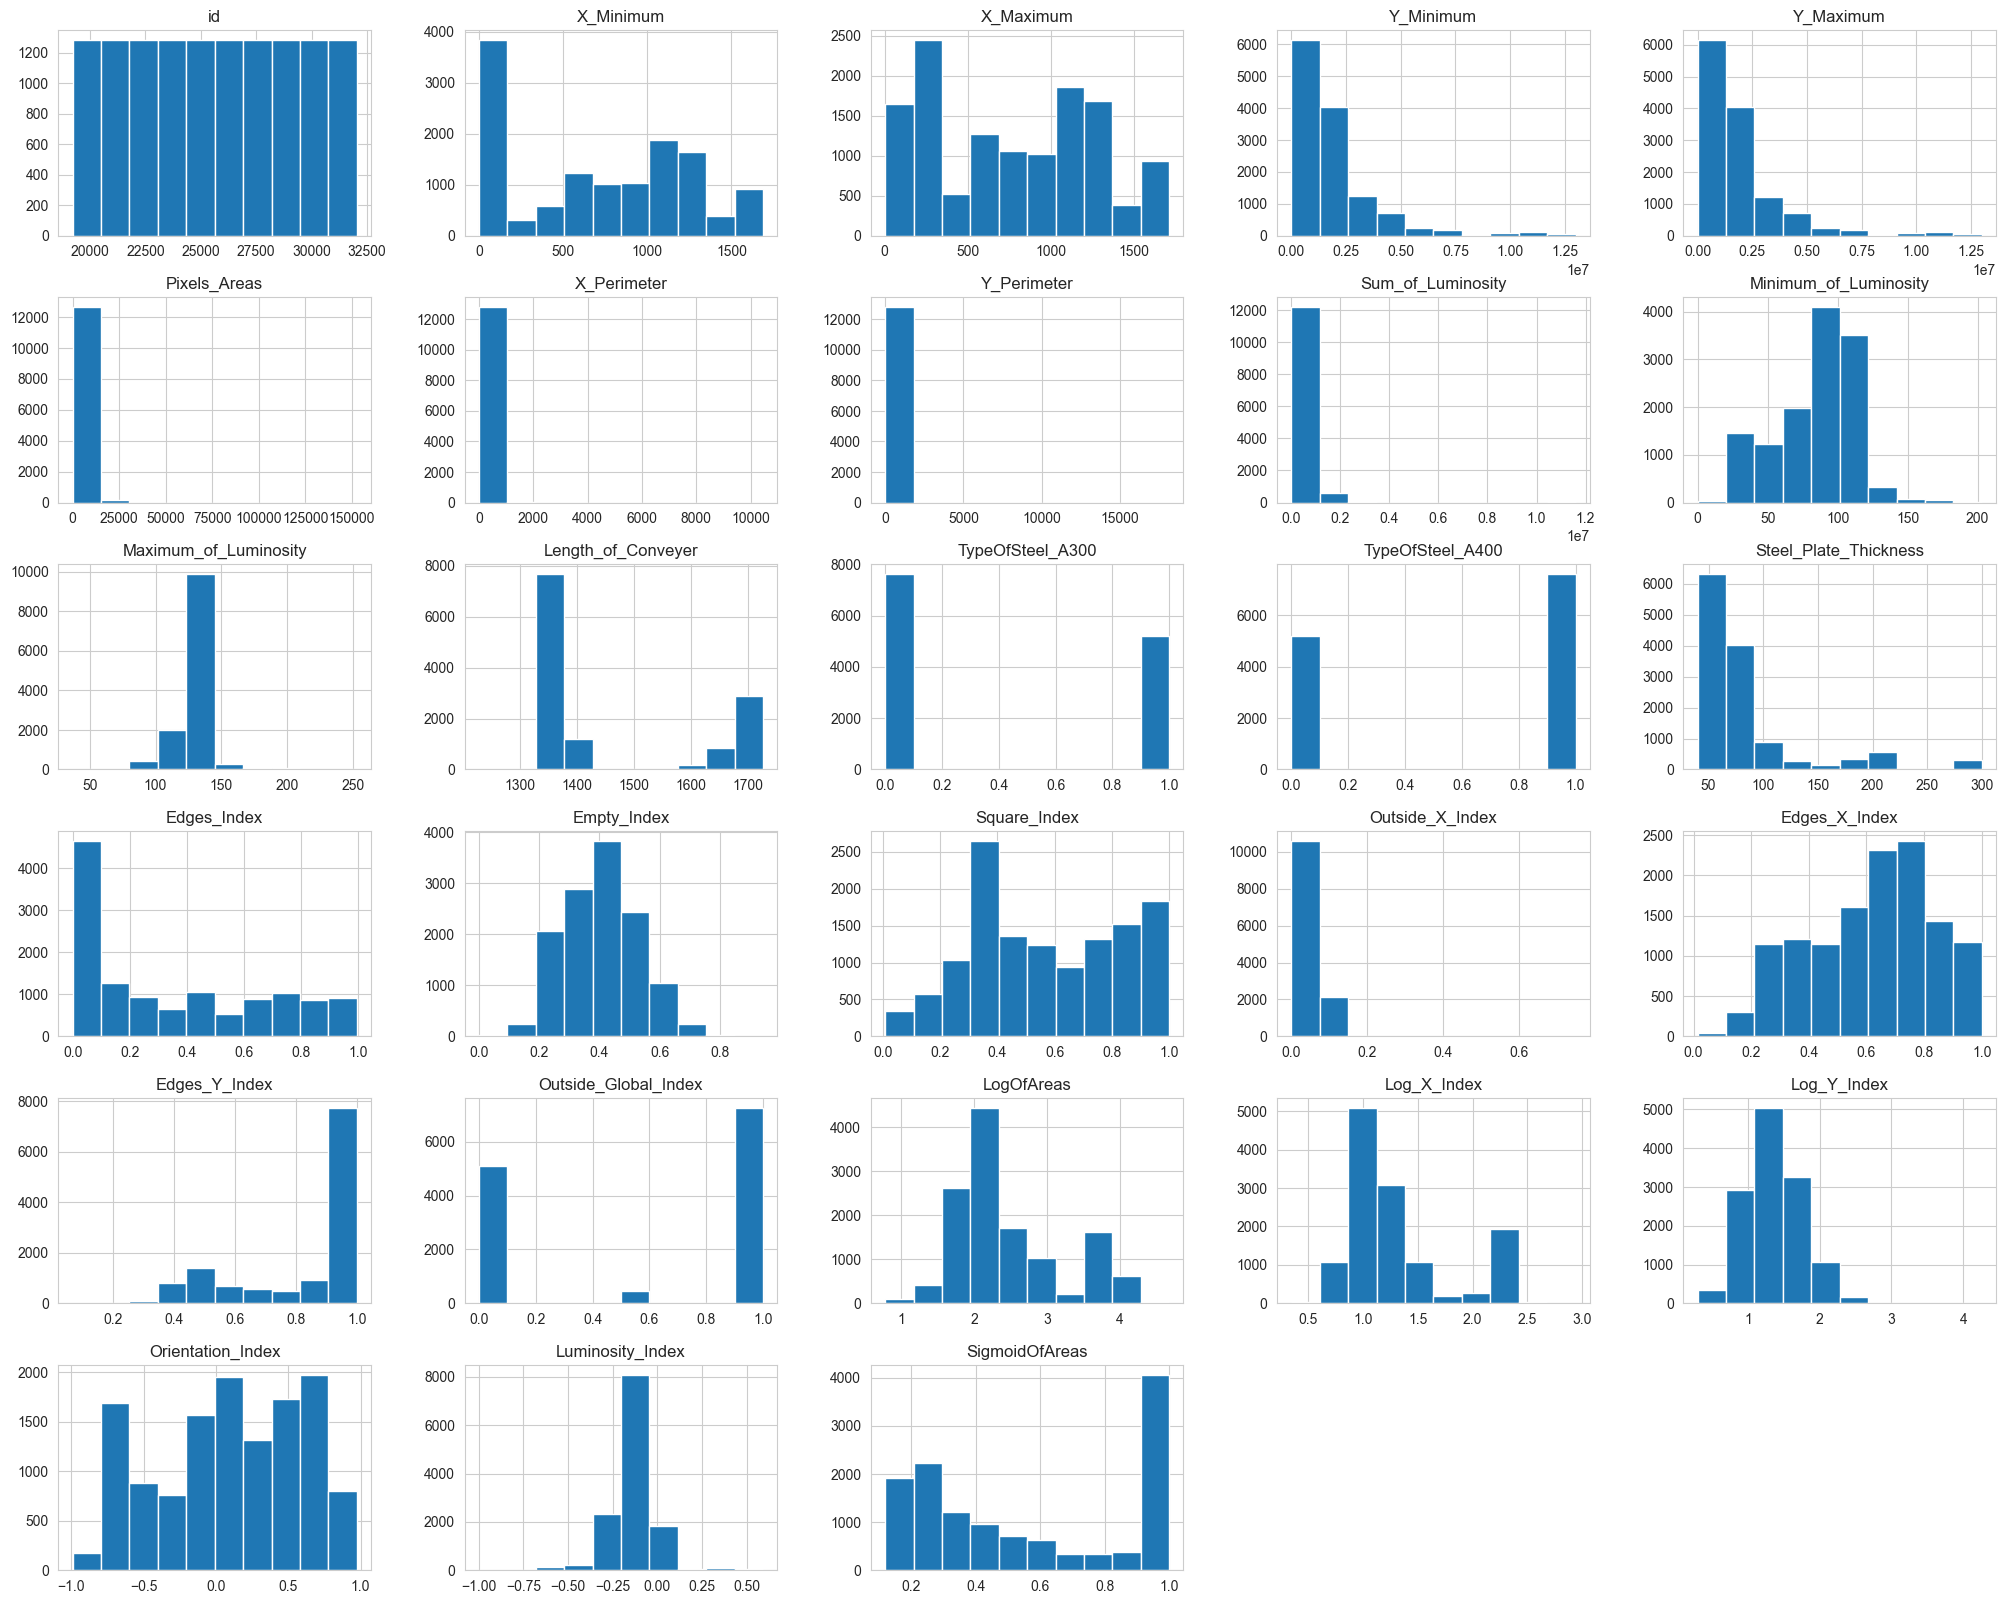

In [18]:
test.hist(figsize=(25, 20))

id                          Axes(0.125,0.747241;0.0945122x0.132759)
X_Minimum                Axes(0.238415,0.747241;0.0945122x0.132759)
X_Maximum                Axes(0.351829,0.747241;0.0945122x0.132759)
Y_Minimum                Axes(0.465244,0.747241;0.0945122x0.132759)
Y_Maximum                Axes(0.578659,0.747241;0.0945122x0.132759)
Pixels_Areas             Axes(0.692073,0.747241;0.0945122x0.132759)
X_Perimeter              Axes(0.805488,0.747241;0.0945122x0.132759)
Y_Perimeter                 Axes(0.125,0.587931;0.0945122x0.132759)
Sum_of_Luminosity        Axes(0.238415,0.587931;0.0945122x0.132759)
Minimum_of_Luminosity    Axes(0.351829,0.587931;0.0945122x0.132759)
Maximum_of_Luminosity    Axes(0.465244,0.587931;0.0945122x0.132759)
Length_of_Conveyer       Axes(0.578659,0.587931;0.0945122x0.132759)
TypeOfSteel_A300         Axes(0.692073,0.587931;0.0945122x0.132759)
TypeOfSteel_A400         Axes(0.805488,0.587931;0.0945122x0.132759)
Steel_Plate_Thickness       Axes(0.125,0.428621;

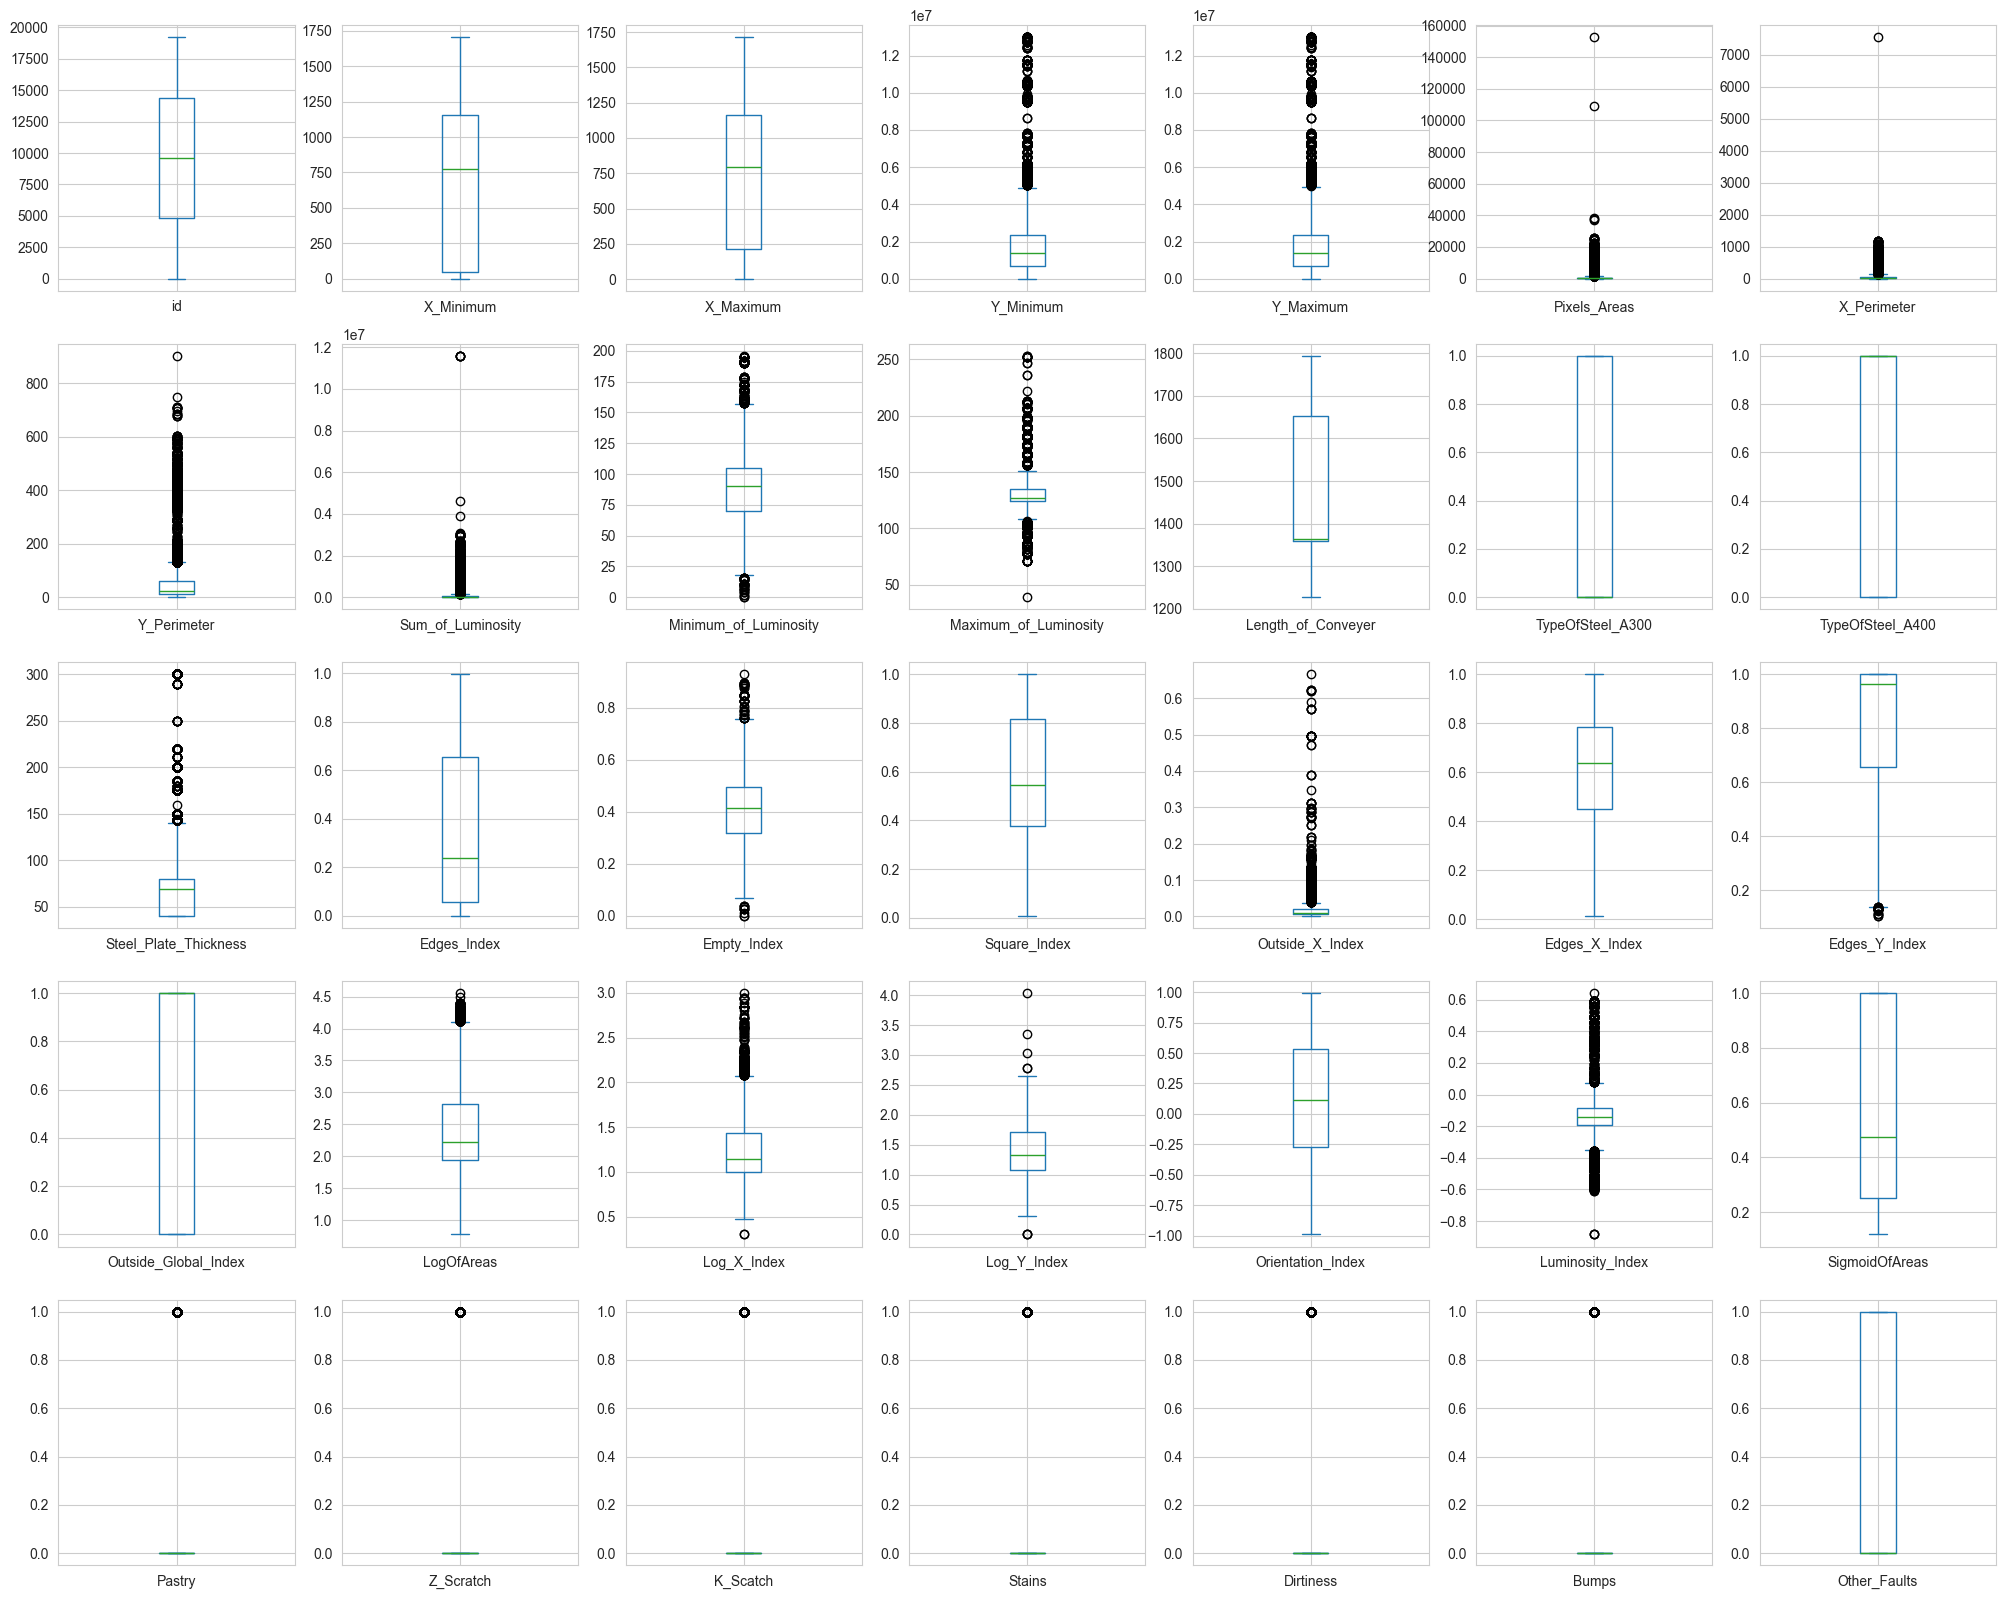

In [26]:
# Individual box plots for each variable
train.plot(kind="box", subplots=True, layout=(5, 7), sharex=False, sharey=False, figsize=(25, 20))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabe

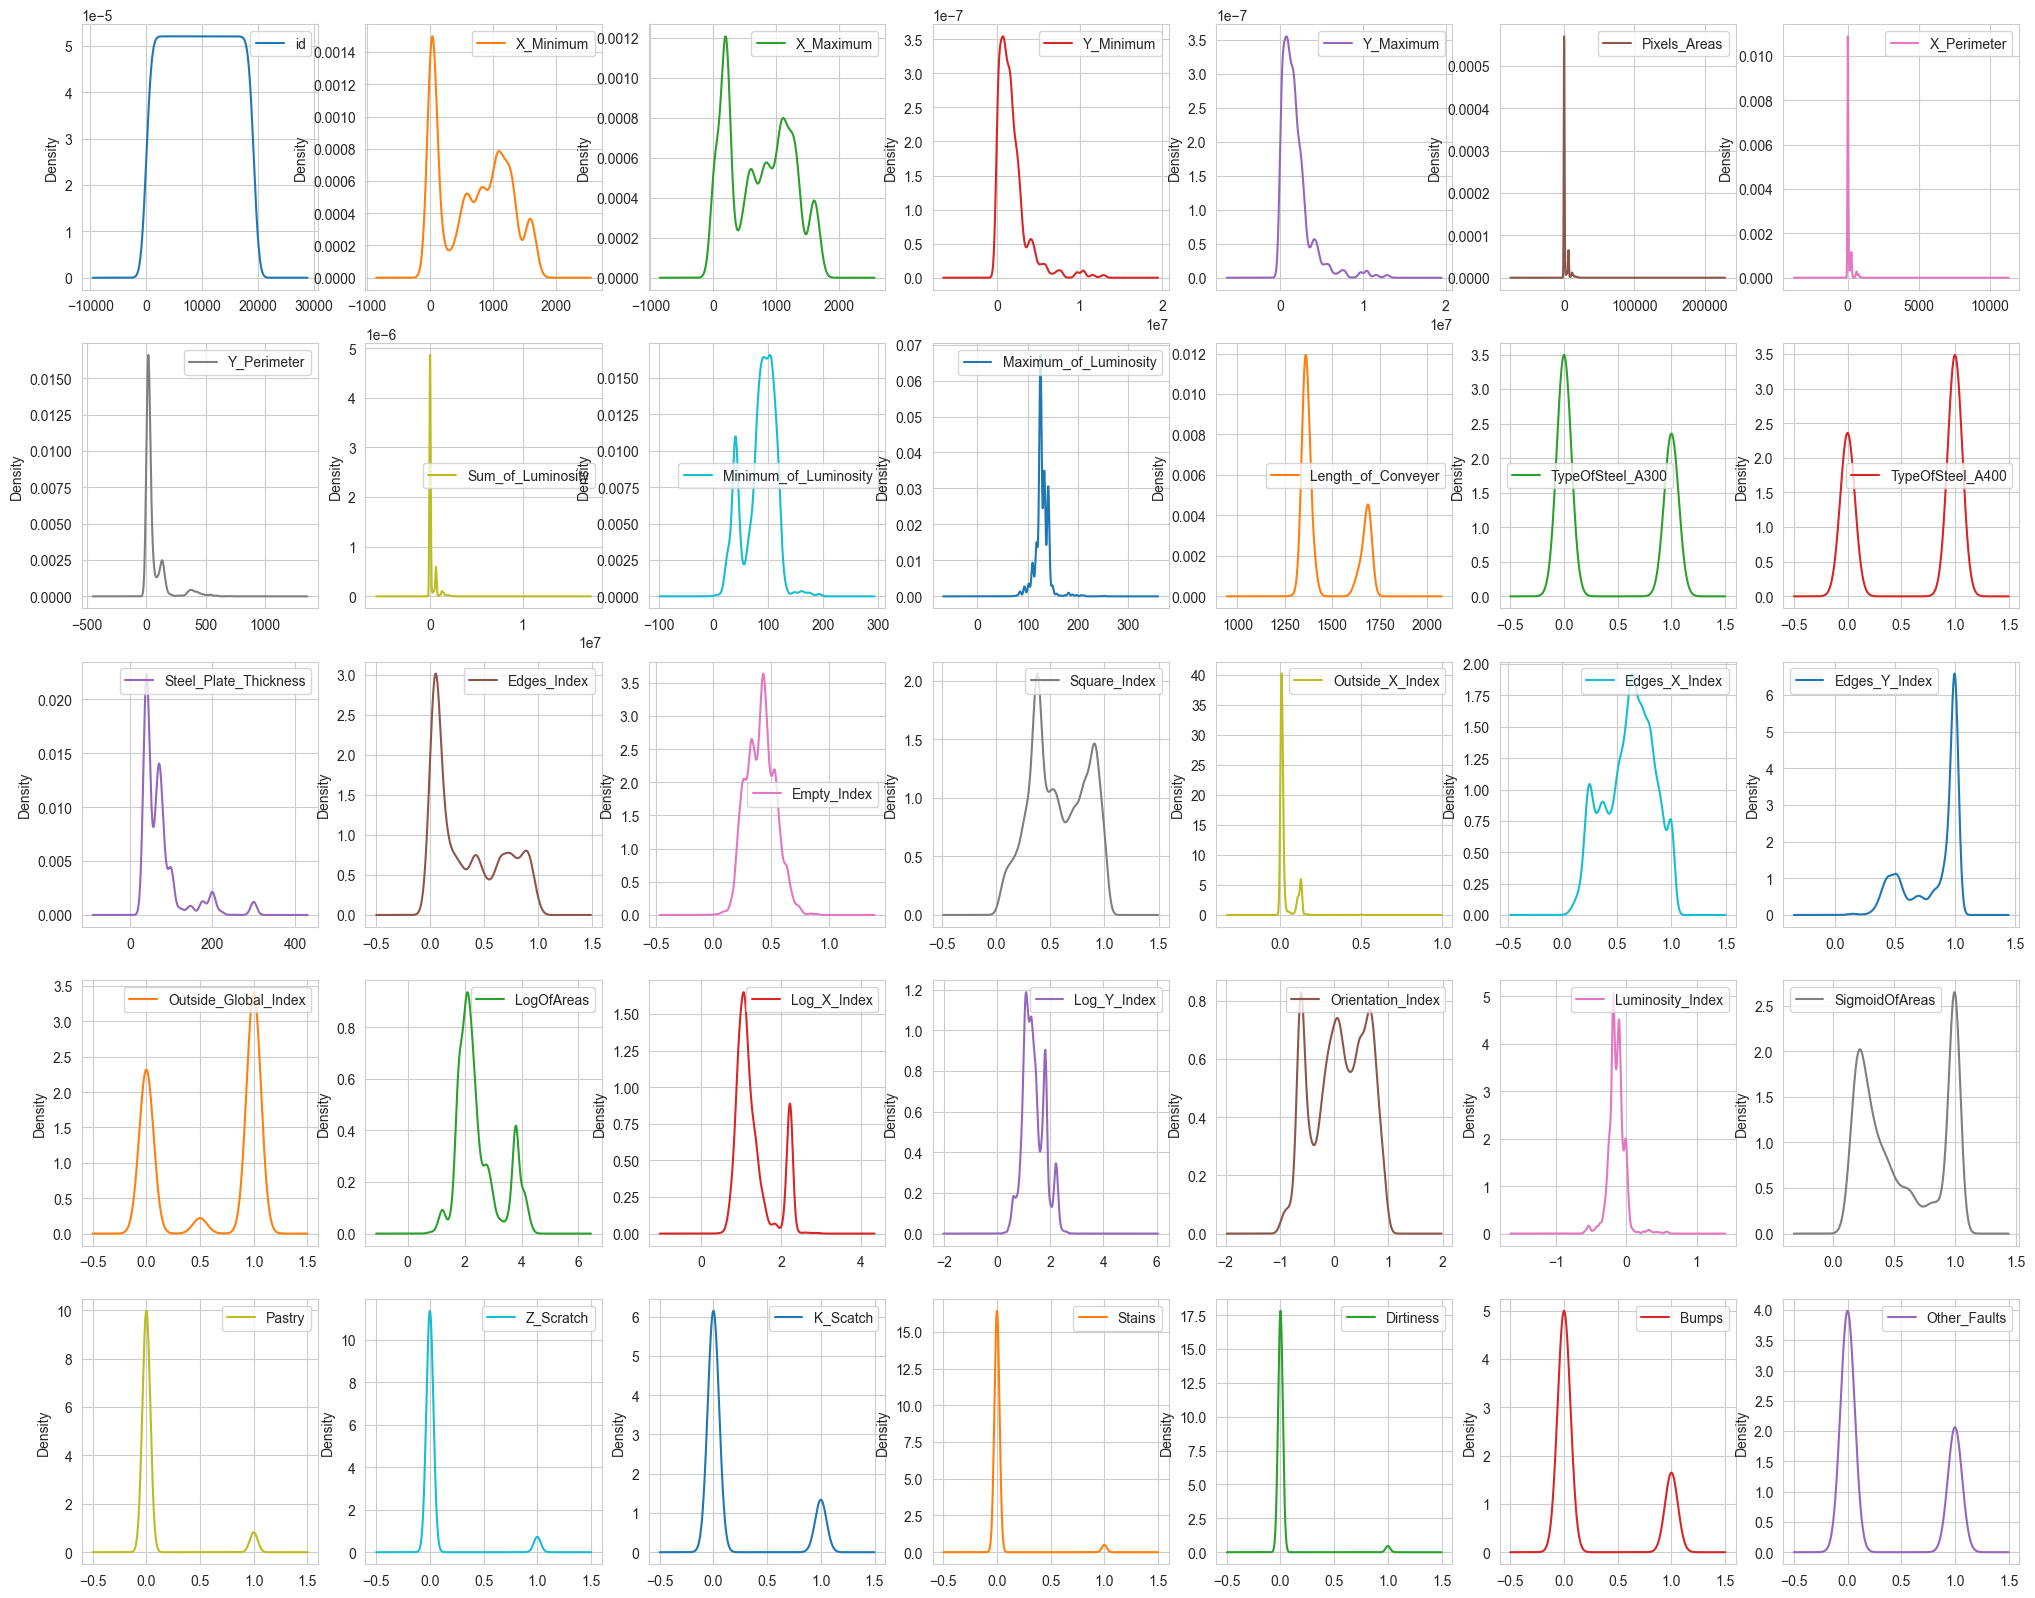

In [27]:
# Density plot for each variable
train.plot(kind="density", subplots=True, layout=(5, 7), sharex=False, sharey=False, figsize=(25, 20))

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='X_Minimum', ylabel='id'>,
        <Axes: xlabel='X_Maximum', ylabel='id'>, ...,
        <Axes: xlabel='Dirtiness', ylabel='id'>,
        <Axes: xlabel='Bumps', ylabel='id'>,
        <Axes: xlabel='Other_Faults', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='X_Minimum'>,
        <Axes: xlabel='X_Minimum', ylabel='X_Minimum'>,
        <Axes: xlabel='X_Maximum', ylabel='X_Minimum'>, ...,
        <Axes: xlabel='Dirtiness', ylabel='X_Minimum'>,
        <Axes: xlabel='Bumps', ylabel='X_Minimum'>,
        <Axes: xlabel='Other_Faults', ylabel='X_Minimum'>],
       [<Axes: xlabel='id', ylabel='X_Maximum'>,
        <Axes: xlabel='X_Minimum', ylabel='X_Maximum'>,
        <Axes: xlabel='X_Maximum', ylabel='X_Maximum'>, ...,
        <Axes: xlabel='Dirtiness', ylabel='X_Maximum'>,
        <Axes: xlabel='Bumps', ylabel='X_Maximum'>,
        <Axes: xlabel='Other_Faults', ylabel='X_Maximum'>],
       ...,
       [<Axes: xlabel='id', 

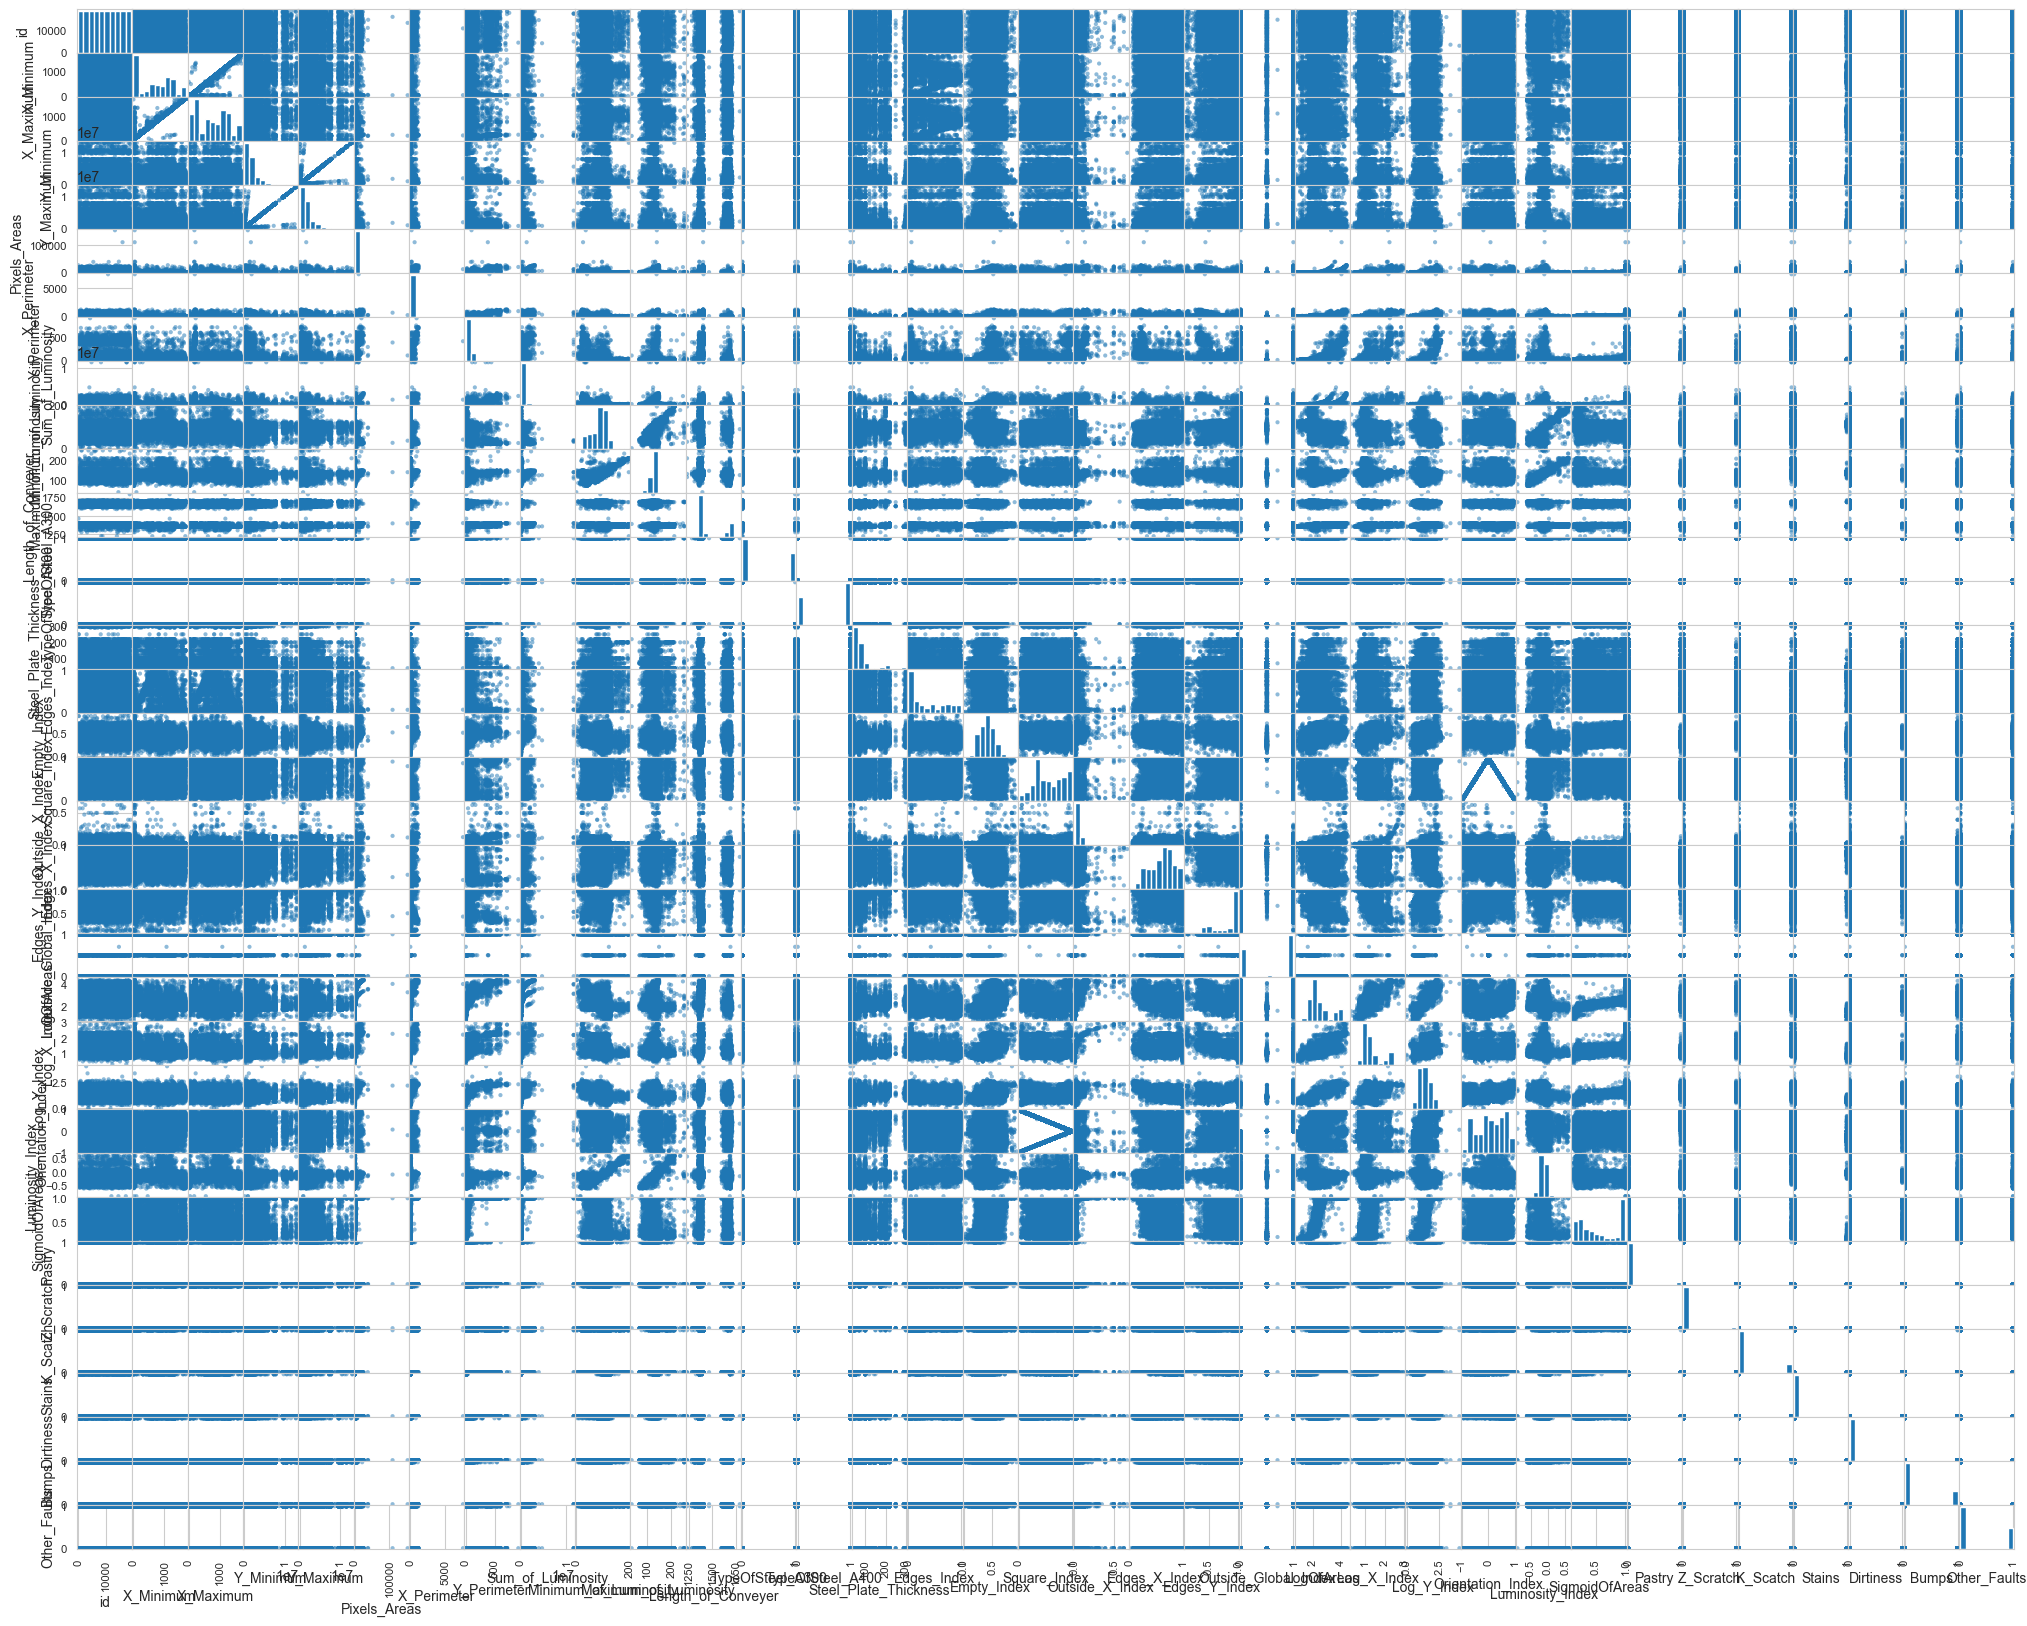

In [24]:
# Scatter plot
pd.plotting.scatter_matrix(train, figsize=(25, 20))

<Axes: >

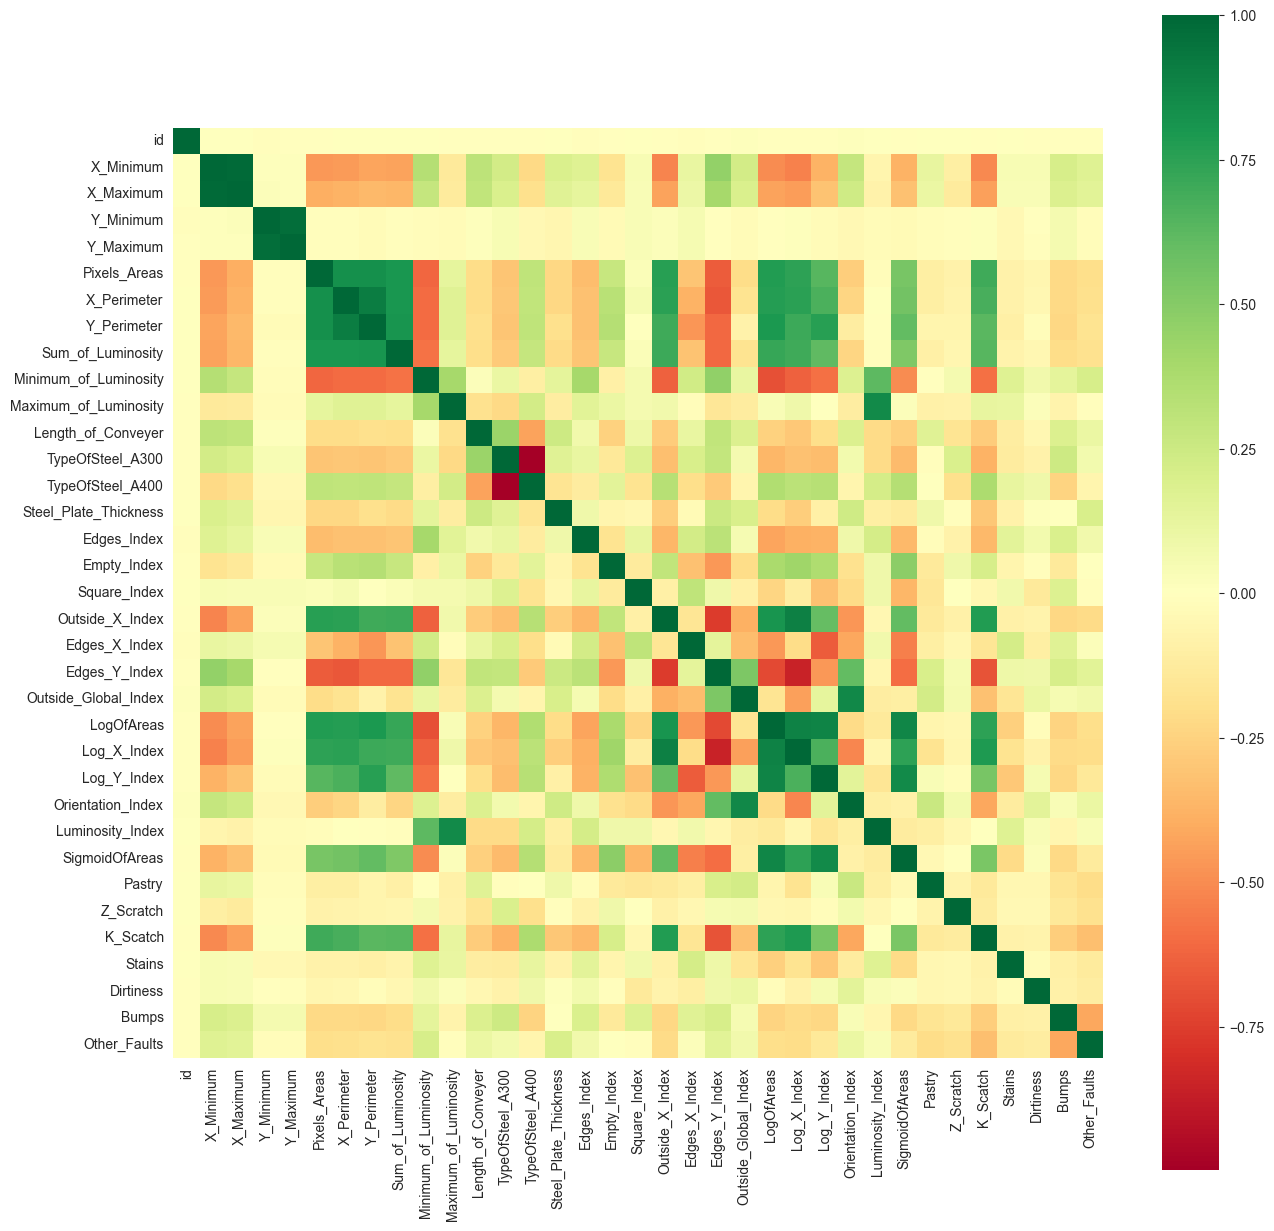

In [20]:
sns.heatmap(train.corr(), square=True, cmap="RdYlGn", ax=plt.subplots(figsize=(15, 15))[1])